# kMeans
Reading
* Leskovec: 7.3
* Brunton: 5.3


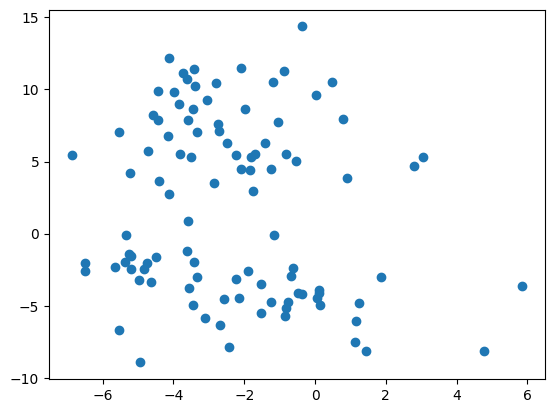

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, n_features=2, centers=4,
                  cluster_std=1.8,random_state=50)

plt.scatter(X[:,0], X[:,1])

## kMeans

[0 0 0 1 2 2 3 1 0 1 2 0 1 3 2 3 3 3 1 1 0 2 2 0 3 3 0 2 2 1 1 0 2 3 0 2 1
 1 0 0 2 2 2 0 1 3 0 2 2 1 1 2 3 3 1 1 0 3 0 0 1 1 3 2 0 1 1 1 1 1 1 2 1 0
 0 3 1 2 1 2 0 0 3 1 3 3 1 0 2 2 1 2 2 2 1 0 1 2 3 3]
[0 1 1 1 1]


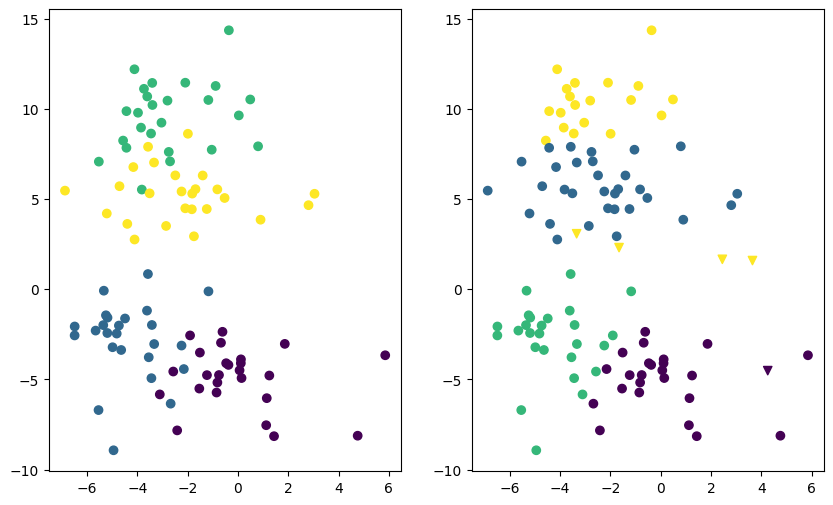

In [38]:
from sklearn.cluster import KMeans

k=4
kmeans = KMeans(n_clusters=k, random_state=30, n_init='auto')
kmeans.fit(X)

# Results
print(kmeans.labels_)

# Prediction
X_test = np.random.rand(5,2)*10 - 5
y_test = kmeans.predict(X_test)
print(y_test)

fig,ax = plt.subplots(1,2, figsize=(10,6))
ax[0].scatter(X[:,0], X[:,1], c=y)
ax[1].scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax[1].scatter(X_test[:,0], X_test[:,1], c=y_test, marker='v')

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, kmeans.labels_)

array([[22,  0,  3,  0],
       [ 2,  0, 23,  0],
       [ 0,  7,  0, 18],
       [ 0, 24,  0,  1]])

array([[22,  3,  0,  0],
       [ 2, 23,  0,  0],
       [ 0,  0, 18,  7],
       [ 0,  0,  1, 24]])

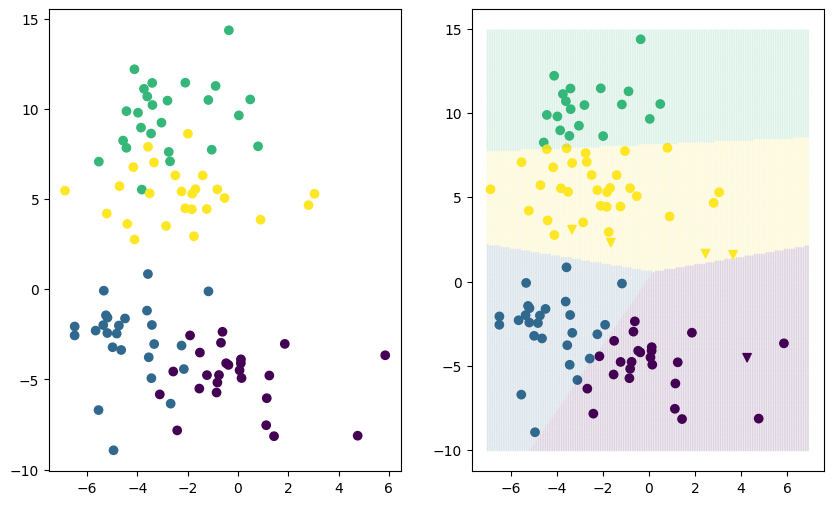

In [48]:
# Relabel
relabel = np.choose(kmeans.labels_,[0,3,1,2])
#y_pred = np.choose(y_test)

# Results Map
grid_x, grid_y = np.meshgrid(np.arange(-7, 7, 0.1), np.arange(-10, 15, 0.1))
grid_pts = np.array([grid_x.flatten(),grid_y.flatten()]).T
grid_grp = kmeans.predict(grid_pts)
grid_grp = np.choose(grid_grp, [0,3,1,2])

fig,ax = plt.subplots(1,2, figsize=(10,6))
ax[0].scatter(X[:,0], X[:,1], c=y)
ax[1].scatter(X[:,0], X[:,1], c=relabel)
ax[1].scatter(grid_pts[:,0], grid_pts[:,1], c=grid_grp, alpha=0.1, marker='.', s=2)
ax[1].scatter(X_test[:,0], X_test[:,1], c=y_test, marker='v')

confusion_matrix(y, relabel)

In [ ]:
### Another way to relabel groups

# Plot it
fig,ax = plt.subplots(1,2, figsize=(10,6))
for grp in range(k):
    ax[0].scatter(X[y==grp,0], X[y==grp,1], label=grp)
    ax[1].scatter(X[kmeans.labels_==grp,0], X[kmeans.labels_==grp,1], label=grp)

# Results Map
grid_x, grid_y = np.meshgrid(np.arange(-7, 7, 0.1), np.arange(-10, 15, 0.1))
grid_pts = np.array([grid_x.flatten(),grid_y.flatten()]).T
grid_grp = kmeans.predict(grid_pts)

# Plot
ax[0].legend()
ax[1].scatter(X_test[:,0], X_test[:,1], c=y_test, marker='v')
ax[1].scatter(grid_pts[:,0], grid_pts[:,1], c=grid_grp, alpha=0.1, marker=".", s=2)
ax[1].legend()

## Evaluate without labels

/home/meo/.virtualenvs/MachineLearning/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/meo/.virtualenvs/MachineLearning/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/meo/.virtualenvs/MachineLearning/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/meo/.virtualenvs/MachineLearning/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: Fut

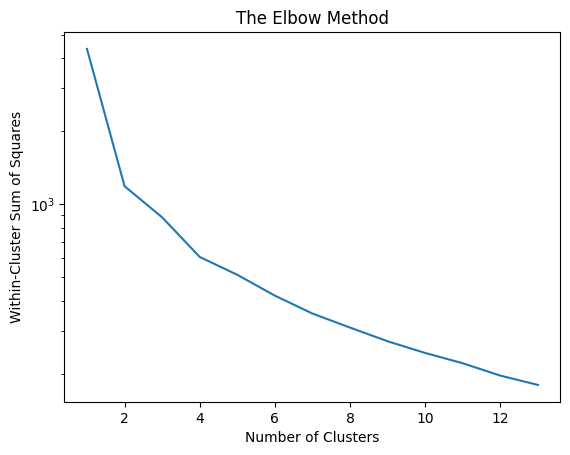

In [50]:
# Evaluate using WCSS and Elbow Method
num_clusters = []
wcss = []

for k in range(1, 14):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    num_clusters.append(k)
    wcss.append(kmeans.inertia_)

plt.plot(num_clusters,wcss)
plt.yscale('log')
plt.title('The Elbow Method') # sets y-axis to a logarithmic scale to emphasize change in slope
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

## Number-guessing game

In [ ]:
rnd_num = np.random.randint(2,10)

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, n_features=2, centers=rnd_num,
                  cluster_std=0.7, random_state=99)

num_clusters = []
wcss = []

for k in range(1,14):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  num_clusters.append(k)
  wcss.append(kmeans.inertia_)

plt.plot(num_clusters, wcss)
plt.yscale('log')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

In [ ]:
print(rnd_num)